# Name: Yuning Lei
# Github username: Thundereggg
# USC ID: 4169712364

In [556]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import random
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import SpectralClustering
from sklearn.metrics import mean_squared_error


### 1. Supervised, Semi-Supervised, and Unsupervised Learning

(a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set from:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/
machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which
has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has
two output classes.

In [18]:
features=['id','class']
for i in range(1,31):
    features.append('attributes '+str(i))

In [19]:
data = pd.read_csv('../data/Homework8Data/wdbc.data',names=features)
data

,id,class,attributes 1,attributes 2,attributes 3,attributes 4,attributes 5,attributes 6,attributes 7,attributes 8,...,attributes 21,attributes 22,attributes 23,attributes 24,attributes 25,attributes 26,attributes 27,attributes 28,attributes 29,attributes 30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


(b) Monte-Carlo Simulation: Repeat the following procedures for supervised, unsupervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the average scores (accuracy, precision,
recall, F1-score, and AUC) that you obtain from each algorithm.

i. Supervised Learning: Train an L1-penalized SVM to classify the data.
Use 5 fold cross validation to choose the penalty parameter. Use normalized
data. Report the average accuracy, precision, recall, F1-score, and AUC, for
both training and test sets over your M runs. Plot the ROC and report the
confusion matrix for training and testing in one of the runs.

In [232]:
acc_train=[]
prec_train=[]
recall_train=[]
f1_train=[]
auc_train=[]
acc_test=[]
prec_test=[]
recall_test=[]
f1_test=[]
auc_test=[]
for i in range(1,31):
    x=data.drop(['id','class'],axis=1)
    data['class'] = data['class'].replace(['B', 'M'], [0,1])
    # Get 20% negative and positive class separately
    b=data[data['class']==0]
    m=data[data['class']==1]
    train_b_x, test_b_x, train_b_y, test_b_y = train_test_split(b.drop(['id','class'],axis=1), b['class'], test_size=0.2,train_size=0.8, random_state=random.randint(0,100))
    train_m_x, test_m_x, train_m_y, test_m_y = train_test_split(m.drop(['id','class'],axis=1), m['class'], test_size=0.2,train_size=0.8, random_state=random.randint(0,100))
    train_x=pd.concat([train_b_x,train_m_x],axis=0)
    train_y=pd.concat([train_b_y,train_m_y],axis=0)
    test_x=pd.concat([test_b_x,test_m_x],axis=0)
    test_y=pd.concat([test_b_y,test_m_y],axis=0)    
    # Normalize the attributes
    train_x_nor = pd.DataFrame(preprocessing.normalize(train_x))
    test_x_nor=pd.DataFrame(preprocessing.normalize(test_x))
    parameters = [{'C': np.logspace(-3, 6, num = 10)}]
    # Test
    svc = svm.SVC()
    clf1 = GridSearchCV(LinearSVC(penalty='l1', dual = False),parameters,cv=5)
    clf1.fit(train_x_nor,train_y)
    predict_y = clf1.predict(test_x_nor)
    acc_test.append(accuracy_score(test_y, predict_y))
    prec_test.append(precision_score(test_y, predict_y))
    recall_test.append(recall_score(test_y, predict_y))
    f1_test.append(f1_score(test_y, predict_y))
    fpr, tpr, _ = roc_curve(test_y,predict_y)
    auc_test.append(auc(fpr, tpr))
    # Train
    pred_y_train=clf1.predict(train_x_nor)
    acc_train.append(accuracy_score(train_y, pred_y_train))
    prec_train.append(precision_score(train_y, pred_y_train))
    recall_train.append(recall_score(train_y, pred_y_train))
    f1_train.append(f1_score(train_y, pred_y_train))
    fpr1, tpr1, _ = roc_curve(train_y,pred_y_train)
    auc_train.append(auc(fpr1, tpr1))

In [235]:
print('Average accuracy for training set is ', np.mean(acc_train))
print('Average precision for training set is ', np.mean(prec_train))
print('Average recall for training set is ', np.mean(recall_train))
print('Average f1 for training set is ', np.mean(f1_train))
print('Average AUC for training set is ', np.mean(auc_train))
print('\n')
print('Average accuracy for test set is ', np.mean(acc_test))
print('Average precision for test set is ', np.mean(prec_test))
print('Average recall for test set is ', np.mean(recall_test))
print('Average f1 for test set is ', np.mean(f1_test))
print('Average AUC for test set is ', np.mean(auc_test))

Average accuracy for training set is  0.9831130690161529
Average precision for training set is  0.9853588636898318
Average recall for training set is  0.9690335305719917
Average f1 for training set is  0.9771159618264991
Average AUC for training set is  0.980247759438043


Average accuracy for test set is  0.9626086956521738
Average precision for test set is  0.9572715633350917
Average recall for test set is  0.9426356589147287
Average f1 for test set is  0.9494893010403478
Average AUC for test set is  0.9585863479758828


In [233]:
conf_m_tra=confusion_matrix(test_y,predict_y)
print('Confusion matrix for test set is \n',conf_m_tra)

Confusion matrix for test set is 
 [[71  1]
 [ 1 42]]


In [234]:
conf_m_te=confusion_matrix(train_y,pred_y_train)
print('Confusion matrix for training set is \n',conf_m_te)

Confusion matrix for training set is 
 [[281   4]
 [  6 163]]


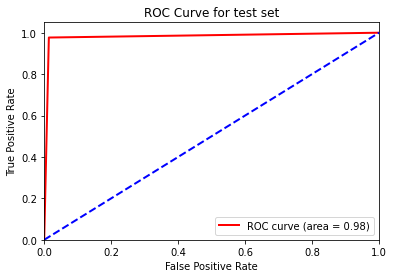

In [238]:
fpr, tpr, _ = roc_curve(test_y,predict_y)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for test set')
plt.legend(loc="lower right")
plt.show()
#print('AUC for test set is',roc_auc)

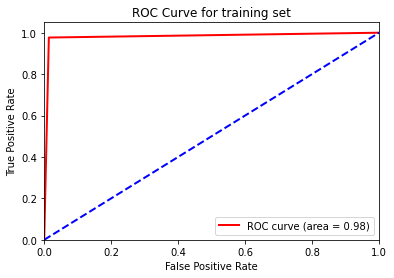

In [239]:
fpr1, tpr1, _ = roc_curve(train_y,pred_y_train)
roc_auc1 = auc(fpr1, tpr1)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for training set')
plt.legend(loc="lower right")
plt.show()
#print('AUC for training set is',roc_auc1)

ii. Semi-Supervised Learning/ Self-training: select 50% of the positive
class along with 50% of the negative class in the training set as labeled data
and the rest as unlabelled data. You can select them randomly.


A. Train an L1-penalized SVM to classify the labeled data Use normalized
data. Choose the penalty parameter using 5 fold cross validation.


B. Find the unlabeled data point that is the farthest to the decision boundary
of the SVM. Let the SVM label it (ignore its true label), and add it to
the labeled data, and retrain the SVM. Continue this process until all
unlabeled data are used. Test the final SVM on the test data and the
average accuracy, precision, recall, F1-score, and AUC, for both training
and test sets over your M runs. Plot the ROC and report the confusion
matrix for training and testing in one of the runs.

In [256]:
acc_train=[]
prec_train=[]
recall_train=[]
f1_train=[]
auc_train=[]
acc_test=[]
prec_test=[]
recall_test=[]
f1_test=[]
auc_test=[]
for i in range(1,31):
    x=data.drop(['id','class'],axis=1)
    data['class'] = data['class'].replace(['B', 'M'], [0,1])
    # Get 20% negative and positive class separately
    b=data[data['class']==0]
    m=data[data['class']==1]
    train_b_x, test_b_x, train_b_y, test_b_y = train_test_split(b.drop(['id','class'],axis=1), b['class'], test_size=0.2,train_size=0.8, random_state=random.randint(0,100))
    train_m_x, test_m_x, train_m_y, test_m_y = train_test_split(m.drop(['id','class'],axis=1), m['class'], test_size=0.2,train_size=0.8, random_state=random.randint(0,100))
    train_x=pd.concat([train_b_x,train_m_x],axis=0)
    train_y=pd.concat([train_b_y,train_m_y],axis=0)
    # Normalize the attributes
    train_bx_nor = pd.DataFrame(preprocessing.normalize(train_b_x))
    train_mx_nor = pd.DataFrame(preprocessing.normalize(train_m_x))
    train_x_nor = pd.DataFrame(preprocessing.normalize(train_x))
    # Add predictor to training set
    train_b_y=train_b_y.reset_index(drop=True)
    train_m_y=train_m_y.reset_index(drop=True)
    train_y=train_y.reset_index(drop=True)
    train_bx_nor['class']=train_b_y
    train_mx_nor['class']=train_m_y
    train_x_nor['class']=train_y
    #test_y=pd.concat([test_b_y,test_m_y],axis=0)
    # get 50% of each class in training set as labeled data
    label=pd.concat([train_bx_nor.sample(frac=0.5, random_state=random.randint(0,100)),train_mx_nor.sample(frac=0.5, random_state=random.randint(0,100))],axis=0)
    label_x=label.loc[:,:29]
    label_y=label['class']
    unlabel_data=train_x_nor.append(label).drop_duplicates(keep=False)
    unlabel=unlabel_data.loc[:,:29]
    unlabel_y=unlabel_data['class']
    
    for i in range(len(unlabel)):
        svc = svm.SVC()
        clf2 = GridSearchCV(LinearSVC(penalty='l1', dual = False),parameters,cv=5)
        clf2.fit(label_x,label_y)
        far = np.argmax(clf2.decision_function(unlabel)) # The farest point
        farest_p=unlabel.iloc[far,:].to_frame().T # Reference 1
        pred_label=pd.DataFrame(clf2.predict(farest_p))
        label_y = pd.concat([label_y,pred_label],axis=0)
        label_x = label_x.append(farest_p)
        unlabel = unlabel.reset_index(drop=True)
        unlabel = unlabel.drop(index=far,axis=0) # Delete the used data
        
    # Test/unlabel
    predict_y = clf2.predict(unlabel_data.loc[:,:29])
    acc_test.append(accuracy_score(unlabel_y, predict_y))
    prec_test.append(precision_score(unlabel_y, predict_y))
    recall_test.append(recall_score(unlabel_y, predict_y))
    f1_test.append(f1_score(unlabel_y, predict_y))
    fpr, tpr, _ = roc_curve(unlabel_y,predict_y)
    auc_test.append(auc(fpr, tpr))
    # Train/label
    pred_y_train=clf1.predict(label_x)
    acc_train.append(accuracy_score(label_y, pred_y_train))
    prec_train.append(precision_score(label_y, pred_y_train))
    recall_train.append(recall_score(label_y, pred_y_train))
    f1_train.append(f1_score(label_y, pred_y_train))
    fpr1, tpr1, _ = roc_curve(label_y,pred_y_train)
    auc_train.append(auc(fpr1, tpr1))


In [257]:
print('Average accuracy for training set is ', np.mean(acc_train))
print('Average precision for training set is ', np.mean(prec_train))
print('Average recall for training set is ', np.mean(recall_train))
print('Average f1 for training set is ', np.mean(f1_train))
print('Average AUC for training set is ', np.mean(auc_train))
print('\n')
print('Average accuracy for test set is ', np.mean(acc_test))
print('Average precision for test set is ', np.mean(prec_test))
print('Average recall for test set is ', np.mean(recall_test))
print('Average f1 for test set is ', np.mean(f1_test))
print('Average AUC for test set is ', np.mean(auc_test))

Average accuracy for training set is  0.9676211453744495
Average precision for training set is  0.9752564482462734
Average recall for training set is  0.9399110843554351
Average f1 for training set is  0.9570100832703591
Average AUC for training set is  0.9626163665925969


Average accuracy for test set is  0.9470760233918127
Average precision for test set is  0.9113129326075852
Average recall for test set is  0.9537254901960783
Average f1 for test set is  0.9311422664907465
Average AUC for test set is  0.9484245166598109


In [258]:
conf_m_tra=confusion_matrix(unlabel_y,predict_y)
print('Confusion matrix for test set is \n',conf_m_tra)

Confusion matrix for test set is 
 [[138   5]
 [  6  79]]


In [259]:
conf_m_te=confusion_matrix(label_y,pred_y_train)
print('Confusion matrix for training set is \n',conf_m_te)

Confusion matrix for training set is 
 [[281   5]
 [  8 160]]


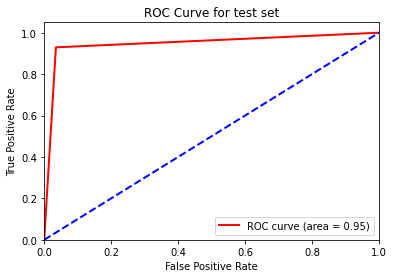

In [260]:
fpr, tpr, _ = roc_curve(unlabel_y,predict_y)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for test set')
plt.legend(loc="lower right")
plt.show()

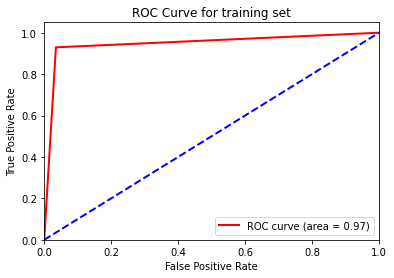

In [261]:
fpr1, tpr1, _ = roc_curve(label_y,pred_y_train)
roc_auc1 = auc(fpr1, tpr1)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for training set')
plt.legend(loc="lower right")
plt.show()

iii. Unsupervised Learning: Run k-means algorithm on the whole training
set. Ignore the labels of the data, and assume k = 2.

A. Run the k-means algorithm multiple times. Make sure that you initialize
the algoritm randomly. How do you make sure that the algorithm was
not trapped in a local minimum?

I use n_init=100 to make sure that the algorithm was not trapped in a local minimum.

B. Compute the centers of the two clusters and find the closest 30 data
points to each center. Read the true labels of those 30 data points and
take a majority poll within them. The majority poll becomes the label
predicted by k-means for the members of each cluster. Then compare the
labels provided by k-means with the true labels of the training data and
report the average accuracy, precision, recall, F1-score, and AUC over M
runs, and ROC and the confusion matrix for one of the runs.

C. Classify test data based on their proximity to the centers of the clusters.
Report the average accuracy, precision, recall, F1-score, and AUC over
M runs, and ROC and the confusion matrix for one of the runs for the
test data.

In [480]:
acc_train=[]
prec_train=[]
recall_train=[]
f1_train=[]
auc_train=[]
acc_test=[]
prec_test=[]
recall_test=[]
f1_test=[]
auc_test=[]
for i in range(1,31):
    x=data.drop(['id','class'],axis=1)
    data['class'] = data['class'].replace(['B', 'M'], [0,1])
    # Get 20% negative and positive class separately
    b=data[data['class']==0]
    m=data[data['class']==1]
    train_b_x, test_b_x, train_b_y, test_b_y = train_test_split(b.drop(['id','class'],axis=1), b['class'], test_size=0.2,train_size=0.8, random_state=random.randint(0,100))
    train_m_x, test_m_x, train_m_y, test_m_y = train_test_split(m.drop(['id','class'],axis=1), m['class'], test_size=0.2,train_size=0.8, random_state=random.randint(0,100))
    train_x=pd.concat([train_b_x,train_m_x],axis=0)
    train_y=pd.concat([train_b_y,train_m_y],axis=0)
    #train_x['class']=train_y
    test_x=pd.concat([test_b_x,test_m_x],axis=0)
    test_y=pd.concat([test_b_y,test_m_y],axis=0) 
    # K-means randomly
    cluster = KMeans(n_clusters=2,init="k-means++", n_init = 100,random_state=random.randint(0,100)) # Reference 2 & 3
    cluster.fit(train_x)
    c=cluster.labels_#.tolist()
    center=cluster.cluster_centers_
    print('when k =',i)
    print('The center for training is ',center)
    nb = NearestNeighbors(n_neighbors=30, algorithm='ball_tree').fit(train_x) # Reference 4
    distances, indices = nb.kneighbors(center,n_neighbors=30)
    c1= train_y.iloc[indices[0]] 
    c2=train_y.iloc[indices[1]]
    c1_la=c1.value_counts().index[0] # Majority label of each cluster
    c2_la=c2.value_counts().index[0]
    # Train
    pred_ytrain = pd.DataFrame(c)
    pred_y1=pred_ytrain[pred_ytrain[0]==0]
    pred_y2=pred_ytrain[pred_ytrain[0]==1]
    pred_y1['class']=c1_la # Map with predicted label
    pred_y2['class']=c2_la
    pred_ytrain=pd.concat([pred_y1,pred_y2],axis=0)
    pred_y_train=pred_ytrain['class']
    acc_train.append(accuracy_score(train_y, pred_y_train))
    prec_train.append(precision_score(train_y, pred_y_train))
    recall_train.append(recall_score(train_y, pred_y_train))
    f1_train.append(f1_score(train_y, pred_y_train))
    fpr1, tpr1, _ = roc_curve(train_y,pred_y_train)
    auc_train.append(auc(fpr1, tpr1))
    # Test
    cluster1 = KMeans(n_clusters=2,init="k-means++", n_init = 100,random_state=random.randint(0,100)) # Reference 2 & 3
    cluster1.fit(test_x)
    cc=cluster1.labels_#.tolist()
    center1=cluster1.cluster_centers_
    print('The center for test set is ',center1)
    nb1 = NearestNeighbors(n_neighbors=30, algorithm='ball_tree').fit(test_x) # Reference 4
    distances1, indices1 = nb1.kneighbors(center1,n_neighbors=30)
    cc1= test_y.iloc[indices1[0]] 
    cc2=test_y.iloc[indices1[1]]
    cc1_la=cc1.value_counts().index[0] # Majority label of each cluster
    cc2_la=cc2.value_counts().index[0]
    pred_ytest = pd.DataFrame(cc)
    pred_y1test=pred_ytest[pred_ytest[0]==0]
    pred_y2test=pred_ytest[pred_ytest[0]==1]
    pred_y1test['class']=cc1_la # Map with predicted label
    pred_y2test['class']=cc2_la
    pred_ytest=pd.concat([pred_y1test,pred_y2test],axis=0)
    predict_y=pred_ytest['class']
    acc_test.append(accuracy_score(test_y, predict_y))
    prec_test.append(precision_score(test_y, predict_y))
    recall_test.append(recall_score(test_y, predict_y))
    f1_test.append(f1_score(test_y, predict_y))
    fpr, tpr, _ = roc_curve(test_y,predict_y)
    auc_test.append(auc(fpr, tpr))

when k = 1
The center for training is  [[1.90932110e+01 2.17277982e+01 1.26332110e+02 1.15128624e+03
  1.02034862e-01 1.48797706e-01 1.75943670e-01 9.86076147e-02
  1.92145872e-01 6.11903670e-02 7.28740367e-01 1.22462110e+00
  5.15437615e+00 9.36903670e+01 6.71859633e-03 3.22058073e-02
  4.24588073e-02 1.55486239e-02 2.03610092e-02 4.09438532e-03
  2.33500000e+01 2.89370642e+01 1.56088073e+02 1.70152294e+03
  1.42224037e-01 3.61670642e-01 4.53536697e-01 1.90990459e-01
  3.15001835e-01 8.78547706e-02]
 [1.24690000e+01 1.85323188e+01 8.05173913e+01 4.88821739e+02
  9.47604058e-02 9.03986957e-02 6.02151643e-02 3.25497710e-02
  1.77779130e-01 6.34897971e-02 2.99728696e-01 1.21119681e+00
  2.11373362e+00 2.31800928e+01 7.17612174e-03 2.32418000e-02
  2.76783177e-02 1.03974203e-02 2.07063072e-02 3.74153768e-03
  1.39297739e+01 2.46237681e+01 9.11026957e+01 6.08864348e+02
  1.30082638e-01 2.22014638e-01 2.13232194e-01 8.91421478e-02
  2.82473913e-01 8.33742029e-02]]
The center for test set is

The center for test set is  [[1.25986000e+01 1.87853333e+01 8.14525556e+01 4.97891111e+02
  9.44807778e-02 9.16873333e-02 6.52142111e-02 3.37623667e-02
  1.79395556e-01 6.35592222e-02 2.87874444e-01 1.24968222e+00
  2.12688444e+00 2.24804000e+01 6.84181111e-03 2.33415889e-02
  3.04887222e-02 1.08223111e-02 1.98877778e-02 3.65902000e-03
  1.41375222e+01 2.54498889e+01 9.31620000e+01 6.25963333e+02
  1.29622333e-01 2.32973222e-01 2.40002889e-01 9.82440000e-02
  2.91546667e-01 8.43985556e-02]
 [1.94076000e+01 2.12136000e+01 1.28568000e+02 1.17953200e+03
  1.01089200e-01 1.55732400e-01 1.78353600e-01 1.01458400e-01
  1.88516000e-01 6.17304000e-02 7.52984000e-01 1.10615200e+00
  5.23308000e+00 9.52936000e+01 6.24416000e-03 3.25077600e-02
  4.32632000e-02 1.56622800e-02 1.90584000e-02 4.18220000e-03
  2.40080000e+01 2.79604000e+01 1.60140000e+02 1.79764000e+03
  1.38280800e-01 3.72790400e-01 4.60984000e-01 1.94180400e-01
  3.02768000e-01 8.94652000e-02]]
when k = 6
The center for training is

when k = 10
The center for training is  [[1.24966997e+01 1.85309632e+01 8.07320397e+01 4.91620963e+02
  9.52106516e-02 9.15845042e-02 6.25408348e-02 3.31205184e-02
  1.78686969e-01 6.35428045e-02 3.08510198e-01 1.23546771e+00
  2.16989377e+00 2.39817422e+01 7.33492918e-03 2.37584278e-02
  2.90557017e-02 1.06066686e-02 2.06605637e-02 3.76562663e-03
  1.39903739e+01 2.47274504e+01 9.15482153e+01 6.15045042e+02
  1.30877450e-01 2.24968272e-01 2.20254076e-01 9.06575127e-02
  2.83762040e-01 8.34791501e-02]
 [1.91686139e+01 2.15419802e+01 1.26908911e+02 1.15817228e+03
  1.02137723e-01 1.48442376e-01 1.76090693e-01 1.00912673e-01
  1.92761386e-01 6.08623762e-02 7.34837624e-01 1.23413366e+00
  5.26854455e+00 9.19688119e+01 6.71884158e-03 3.16474950e-02
  4.26508911e-02 1.58431287e-02 2.12454455e-02 3.91936634e-03
  2.33537624e+01 2.86133663e+01 1.56523762e+02 1.69015842e+03
  1.40708119e-01 3.48377822e-01 4.42702970e-01 1.91683762e-01
  3.15453465e-01 8.53915842e-02]]
The center for test set i

The center for test set is  [[1.24451047e+01 1.85441860e+01 8.03432558e+01 4.89970930e+02
  9.41933721e-02 8.81130233e-02 5.98632093e-02 3.29511628e-02
  1.78340698e-01 6.31096512e-02 3.09536047e-01 1.22189767e+00
  2.20533256e+00 2.38951047e+01 7.51883721e-03 2.25066512e-02
  2.71599070e-02 1.06871628e-02 2.02890581e-02 3.63384884e-03
  1.39599186e+01 2.45990698e+01 9.15439535e+01 6.15565116e+02
  1.31791047e-01 2.17489186e-01 2.18288023e-01 9.29538372e-02
  2.79767442e-01 8.23486047e-02]
 [2.00241379e+01 2.09503448e+01 1.32837931e+02 1.26460000e+03
  1.03357241e-01 1.56216552e-01 1.87059655e-01 1.06983448e-01
  1.97348276e-01 6.16424138e-02 7.88634483e-01 1.24804828e+00
  5.77131034e+00 1.05986552e+02 6.75806897e-03 3.15373448e-02
  4.28041379e-02 1.63312759e-02 2.27313793e-02 3.99234483e-03
  2.42810345e+01 2.82734483e+01 1.62420690e+02 1.82924138e+03
  1.43231034e-01 3.54244828e-01 4.42424138e-01 2.01031034e-01
  3.27131034e-01 8.56117241e-02]]
when k = 15
The center for training i

when k = 19
The center for training is  [[1.26225782e+01 1.86642458e+01 8.15932961e+01 5.01926536e+02
  9.49087709e-02 9.24079330e-02 6.46916137e-02 3.46369972e-02
  1.78988827e-01 6.34790503e-02 3.14571229e-01 1.21120363e+00
  2.22212346e+00 2.48478380e+01 7.18717877e-03 2.37870056e-02
  2.93516721e-02 1.08025559e-02 2.07364469e-02 3.80986955e-03
  1.41742486e+01 2.48520950e+01 9.28156983e+01 6.32316201e+02
  1.30505196e-01 2.27191313e-01 2.24767603e-01 9.36179078e-02
  2.85973184e-01 8.37470950e-02]
 [1.95873958e+01 2.19238542e+01 1.29586458e+02 1.21324167e+03
  9.99881250e-02 1.46536979e-01 1.74128750e-01 9.99858333e-02
  1.90205208e-01 6.01234375e-02 7.53831250e-01 1.20690729e+00
  5.34745833e+00 9.87637500e+01 6.26938542e-03 3.18817396e-02
  4.10236458e-02 1.55423958e-02 2.05985417e-02 3.90535417e-03
  2.40569792e+01 2.92032292e+01 1.60681250e+02 1.80818750e+03
  1.38809792e-01 3.53556875e-01 4.43003125e-01 1.92164271e-01
  3.13144792e-01 8.58676042e-02]]
The center for test set i

The center for test set is  [[1.22593647e+01 1.86516471e+01 7.89672941e+01 4.72829412e+02
  9.33629412e-02 8.55405882e-02 5.58921059e-02 2.89622118e-02
  1.77422353e-01 6.34315294e-02 2.70954118e-01 1.17802588e+00
  1.95067176e+00 2.04473412e+01 6.85858824e-03 2.15671882e-02
  2.70439059e-02 9.46110588e-03 2.04065882e-02 3.55181176e-03
  1.36682471e+01 2.47725882e+01 8.92957647e+01 5.85688235e+02
  1.28580471e-01 2.16058353e-01 2.09609812e-01 8.40401412e-02
  2.89862353e-01 8.32169412e-02]
 [1.95756667e+01 2.22426667e+01 1.29323333e+02 1.20359667e+03
  1.01414333e-01 1.47381333e-01 1.83048333e-01 1.04927667e-01
  1.91613333e-01 6.10286667e-02 7.78210000e-01 1.26387333e+00
  5.30000000e+00 9.72220000e+01 6.82980000e-03 3.32676667e-02
  4.35603333e-02 1.61444667e-02 1.89460000e-02 4.29366667e-03
  2.37763333e+01 2.90873333e+01 1.58150000e+02 1.74993333e+03
  1.38100667e-01 3.42900000e-01 4.39826667e-01 1.87583667e-01
  2.93880000e-01 8.67636667e-02]]
when k = 24
The center for training i

when k = 28
The center for training is  [[1.27355613e+01 1.85166757e+01 8.23747684e+01 5.12168392e+02
  9.54468937e-02 9.37434605e-02 6.63527738e-02 3.58502044e-02
  1.79298638e-01 6.35028065e-02 3.13595640e-01 1.19783460e+00
  2.21535204e+00 2.52737875e+01 7.23308719e-03 2.38377520e-02
  2.99499292e-02 1.09586649e-02 2.06404087e-02 3.74768202e-03
  1.43160082e+01 2.46469755e+01 9.37947139e+01 6.48572480e+02
  1.31180027e-01 2.29215531e-01 2.29379270e-01 9.58135395e-02
  2.86203270e-01 8.37285286e-02]
 [2.01231034e+01 2.19931034e+01 1.33297701e+02 1.27692644e+03
  1.02657241e-01 1.53685402e-01 1.91768276e-01 1.09440805e-01
  1.92317241e-01 6.05920690e-02 8.11719540e-01 1.21534368e+00
  5.69257471e+00 1.08985057e+02 6.55955172e-03 3.19376207e-02
  4.29591954e-02 1.57181264e-02 2.06735632e-02 3.92394253e-03
  2.48111494e+01 2.92978161e+01 1.65880460e+02 1.91536782e+03
  1.41073563e-01 3.61152874e-01 4.67066667e-01 2.02070115e-01
  3.14164368e-01 8.56627586e-02]]
The center for test set i

In [481]:
print('Average accuracy for training set is ', np.mean(acc_train))
print('Average precision for training set is ', np.mean(prec_train))
print('Average recall for training set is ', np.mean(recall_train))
print('Average f1 for training set is ', np.mean(f1_train))
print('Average AUC for training set is ', np.mean(auc_train))
print('\n')
print('Average accuracy for test set is ', np.mean(acc_test))
print('Average precision for test set is ', np.mean(prec_test))
print('Average recall for test set is ', np.mean(recall_test))
print('Average f1 for test set is ', np.mean(f1_test))
print('Average AUC for test set is ', np.mean(auc_test))

Average accuracy for training set is  0.6995594713656387
Average precision for training set is  0.6666666666666666
Average recall for training set is  0.3988165680473373
Average f1 for training set is  0.49860101626199255
Average AUC for training set is  0.6383556524447213


Average accuracy for test set is  0.7678260869565219
Average precision for test set is  0.8
Average recall for test set is  0.49612403100775193
Average f1 for test set is  0.6069101445537005
Average AUC for test set is  0.7131083118001722


In [482]:
conf_m_tra=confusion_matrix(test_y,predict_y)
print('Confusion matrix for test set is \n',conf_m_tra)

Confusion matrix for test set is 
 [[72  0]
 [24 19]]


In [483]:
conf_m_te=confusion_matrix(train_y,pred_y_train)
print('Confusion matrix for training set is \n',conf_m_te)

Confusion matrix for training set is 
 [[285   0]
 [ 61 108]]


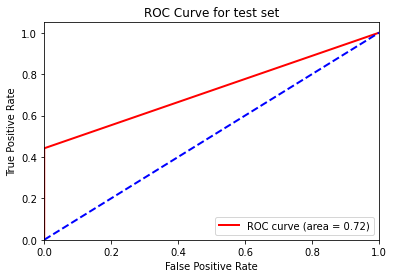

In [484]:
fpr, tpr, _ = roc_curve(test_y,predict_y)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for test set')
plt.legend(loc="lower right")
plt.show()

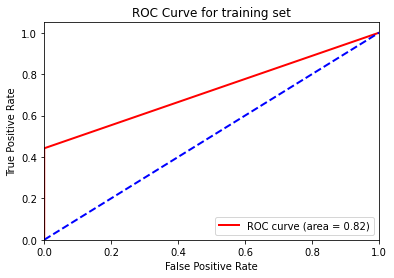

In [485]:
fpr1, tpr1, _ = roc_curve(train_y,pred_y_train)
roc_auc1 = auc(fpr1, tpr1)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for training set')
plt.legend(loc="lower right")
plt.show()

iv. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clustering based on kernels.3 Research what spectral clustering is. Use RBF
kernel with gamma=1 or find a gamma for which the two clutsres have the
same balance as the one in original data set (if the positive class has p and the
negative class has n samples, the two clusters must have p and n members).
Do not label data based on their proximity to cluster center, because spectral
clustering may give you non-convex clusters . Instead, use fit t predict
method.

In [546]:
acc_train=[]
prec_train=[]
recall_train=[]
f1_train=[]
auc_train=[]
acc_test=[]
prec_test=[]
recall_test=[]
f1_test=[]
auc_test=[]
for i in range(1,31):
    x=data.drop(['id','class'],axis=1)
    data['class'] = data['class'].replace(['B', 'M'], [0,1])
    # Get 20% negative and positive class separately
    b=data[data['class']==0]
    m=data[data['class']==1]
    train_b_x, test_b_x, train_b_y, test_b_y = train_test_split(b.drop(['id','class'],axis=1), b['class'], test_size=0.2,train_size=0.8, random_state=random.randint(0,100))
    train_m_x, test_m_x, train_m_y, test_m_y = train_test_split(m.drop(['id','class'],axis=1), m['class'], test_size=0.2,train_size=0.8, random_state=random.randint(0,100))
    train_x=pd.concat([train_b_x,train_m_x],axis=0)
    train_y=pd.concat([train_b_y,train_m_y],axis=0)
    test_x=pd.concat([test_b_x,test_m_x],axis=0)
    test_y=pd.concat([test_b_y,test_m_y],axis=0) 
    # K-means randomly
    sc=SpectralClustering(n_clusters=2,affinity='rbf',gamma=1.0,n_init=100,random_state=random.randint(0,100)).fit(train_x) # Reference 5
    sc.fit(train_x)
    # Train
    pred_y_train=sc.fit_predict(train_x)
    acc_train.append(accuracy_score(train_y, pred_y_train))
    prec_train.append(precision_score(train_y, pred_y_train))
    recall_train.append(recall_score(train_y, pred_y_train))
    f1_train.append(f1_score(train_y, pred_y_train))
    fpr1, tpr1, _ = roc_curve(train_y,pred_y_train)
    auc_train.append(auc(fpr1, tpr1))
    #Test
    predict_y = sc.fit_predict(test_x)
    acc_test.append(accuracy_score(test_y, predict_y))
    prec_test.append(precision_score(test_y, predict_y))
    recall_test.append(recall_score(test_y, predict_y))
    f1_test.append(f1_score(test_y, predict_y))
    fpr, tpr, _ = roc_curve(test_y,predict_y)
    auc_test.append(auc(fpr, tpr))

In [547]:
print('Average accuracy for training set is ', np.mean(acc_train))
print('Average precision for training set is ', np.mean(prec_train))
print('Average recall for training set is ', np.mean(recall_train))
print('Average f1 for training set is ', np.mean(f1_train))
print('Average AUC for training set is ', np.mean(auc_train))
print('\n')
print('Average accuracy for test set is ', np.mean(acc_test))
print('Average precision for test set is ', np.mean(prec_test))
print('Average recall for test set is ', np.mean(recall_test))
print('Average f1 for test set is ', np.mean(f1_test))
print('Average AUC for test set is ', np.mean(auc_test))

Average accuracy for training set is  0.6277533039647579
Average precision for training set is  0.13333333333333333
Average recall for training set is  0.001183431952662722
Average f1 for training set is  0.0023437679165233343
Average AUC for training set is  0.5002408387833489


Average accuracy for test set is  0.6223188405797102
Average precision for test set is  0.16666666666666666
Average recall for test set is  0.005426356589147288
Average f1 for test set is  0.01047138047138047
Average AUC for test set is  0.498083548664944


In [548]:
conf_m_tra=confusion_matrix(test_y,predict_y)
print('Confusion matrix for test set is \n',conf_m_tra)

Confusion matrix for test set is 
 [[70  2]
 [43  0]]


In [549]:
conf_m_te=confusion_matrix(train_y,pred_y_train)
print('Confusion matrix for training set is \n',conf_m_te)

Confusion matrix for training set is 
 [[285   0]
 [169   0]]


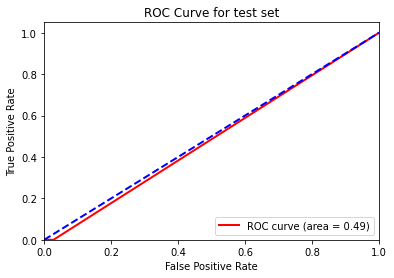

In [550]:
fpr, tpr, _ = roc_curve(test_y,predict_y)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for test set')
plt.legend(loc="lower right")
plt.show()

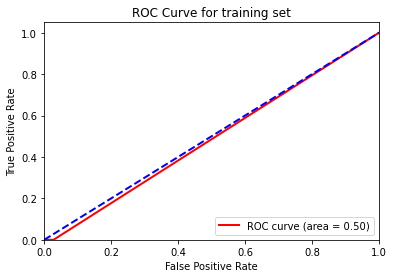

In [551]:
fpr1, tpr1, _ = roc_curve(train_y,pred_y_train)
roc_auc1 = auc(fpr1, tpr1)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for training set')
plt.legend(loc="lower right")
plt.show()

v. One can expect that supervised learning on the full data set works better than
semi-supervised learning with half of the data set labeled.One can expect that
unsupervised learning underperforms in such situations. Compare the results
you obtained by those methods.

From my result above, supervised learning method indeed performs better than the other two methods for both training and test set. And unsupervised learning is the worest of these three for both training and test set.

### 2. Active Learning Using Support Vector Machines

(a) Download the banknote authentication Data Set from: https://archive.ics.uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a
binary classification problem.

In [632]:
# The uci website was crushed when I was doing this problem, so I download the dataset from kaggle.
data=pd.read_csv('../data/Homework8Data/BankNoteAuthentication.csv') 
test=data.sample(472)
test_y=test['class']
test_x=test.iloc[:,:-1]
test

,variance,skewness,curtosis,entropy,class
1323,-0.025314,-0.173830,-0.11339,1.219800,1
1004,-3.718100,-8.508900,12.36300,-0.955180,1
76,3.793500,7.985300,-2.54770,-1.872000,0
867,-6.508400,8.769600,0.23191,-3.937000,1
507,4.601400,5.626400,-2.12350,0.193090,0
...,...,...,...,...,...
897,-0.286960,3.178400,-3.57670,-3.189600,1
785,-1.666200,-0.300050,1.42380,0.024986,1
1276,-0.898090,-4.486200,2.20090,0.507310,1
1201,-0.873400,-0.033118,-0.20165,0.557740,1


In [633]:
train=data.drop(data.index[[test.index]])
train_y=train['class']
train_x=train.iloc[:,:-1]
train

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
4,0.32924,-4.45520,4.5718,-0.98880,0
9,1.53560,9.17720,-2.2718,-0.73535,0
...,...,...,...,...,...
1365,-4.50460,-5.81260,10.8867,-0.52846,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


(b) Repeat each of the following two procedures 50 times. You will have 50 errors for
90 SVMs per each procedure.

i. Train a SVM with a pool of 10 randomly selected data points from the training
set using linear kernel and L1 penalty. Select the penalty parameter using
5-fold cross validation. Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT
replace the samples back into the training set at each step. Calculate the
test error for each SVM. You will have 90 SVMs that were trained using 10,
20, 30, ... , 900 data points and their 90 test errors. You have implemented
passive learning.

In [719]:
test_error11=[]
for i in range(1,51):
    if i==1:  # First, make each svm a list in the test error list
        parameters = [{'C': np.logspace(-3, 6, num = 10)}]
        train_select=train.sample(10)
        while len(train_select['class'].value_counts())==1: # Make sure the selected sample has 2 classes
            train_select=train.sample(10)
        svc = svm.SVC()
        clf2 = GridSearchCV(LinearSVC(penalty='l1', dual = False),parameters,cv=5)
        clf2.fit(train_select.iloc[:,:-1],train_select['class'])
        predict_y = clf2.predict(test_x)
        error=mean_squared_error(test_y,predict_y)
        test_error11.append([error])
        #print(test_error11)
        for i in range(1,90):
            # Adding 10 other randomly selected data points
            select_index=train_select.index.to_list()
            train_unselect=train[~train.index.isin(select_index)] # Reference 6
            unselect=train_unselect.sample(10)
            while len(unselect['class'].value_counts())==1: # Make sure the selected sample has 2 classes
                unselect=train_unselect.sample(10)
            train_select=pd.concat([train_select,unselect],axis=0)
            svc = svm.SVC()
            clf2 = GridSearchCV(LinearSVC(penalty='l1', dual = False),parameters,cv=5)
            clf2.fit(train_select.iloc[:,:-1],train_select['class'])
            predict_y = clf2.predict(test_x)
            error=mean_squared_error(test_y,predict_y)
            test_error11.append([error]) 
    else: # Then, append the list in following iteration to make each svm run 50 times
        parameters = [{'C': np.logspace(-3, 6, num = 10)}]
        train_select=train.sample(10)
        while len(train_select['class'].value_counts())==1: # Make sure the selected sample has 2 classes
            train_select=train.sample(10)
        svc = svm.SVC()
        clf2 = GridSearchCV(LinearSVC(penalty='l1', dual = False),parameters,cv=5)
        clf2.fit(train_select.iloc[:,:-1],train_select['class'])
        predict_y = clf2.predict(test_x)
        error=mean_squared_error(test_y,predict_y)
        test_error11[0].append(error)
        #print(test_error11)
        for j in range(1,90):
            # Adding 10 other randomly selected data points
            select_index=train_select.index.to_list()
            train_unselect=train[~train.index.isin(select_index)]
            unselect=train_unselect.sample(10)
            while len(unselect['class'].value_counts())==1:  # Make sure the selected sample has 2 classes
                unselect=train_unselect.sample(10)
            train_select=pd.concat([train_select,unselect],axis=0)
            svc = svm.SVC()
            clf2 = GridSearchCV(LinearSVC(penalty='l1', dual = False),parameters,cv=5)
            clf2.fit(train_select.iloc[:,:-1],train_select['class'])
            predict_y = clf2.predict(test_x)
            error=mean_squared_error(test_y,predict_y)
            test_error11[j].append(error)
    
            

In [723]:
print('The length of this test error list is ', len(test_error11))
print('The length of each element is',len(test_error11[0]))

The length of this test error list is  90
The length of each element is 50


In [750]:
passive_error=[]
for i in test_error11:
    passive_error.append(np.mean(i)) # Average error of 50 iterations 
passive_error

[0.10458703255313423,
 0.05724576271186441,
 0.03516949152542373,
 0.02805084745762712,
 0.022542372881355934,
 0.020466101694915254,
 0.01949152542372881,
 0.018177966101694917,
 0.01694915254237288,
 0.015932203389830507,
 0.016059322033898305,
 0.015338983050847457,
 0.01466101694915254,
 0.01402542372881356,
 0.01326271186440678,
 0.01309322033898305,
 0.01326271186440678,
 0.01271186440677966,
 0.012754237288135593,
 0.012584745762711862,
 0.012669491525423729,
 0.011398305084745758,
 0.011101694915254236,
 0.010974576271186443,
 0.011101694915254236,
 0.01038135593220339,
 0.009661016949152543,
 0.00923728813559322,
 0.009406779661016948,
 0.009152542372881356,
 0.00885593220338983,
 0.009661016949152543,
 0.009364406779661017,
 0.009364406779661017,
 0.009110169491525424,
 0.00885593220338983,
 0.00885593220338983,
 0.009152542372881356,
 0.008432203389830507,
 0.008389830508474576,
 0.008644067796610169,
 0.00885593220338983,
 0.008516949152542372,
 0.008728813559322033,
 0.008

ii. Train a SVM with a pool of 10 randomly selected data points from the training
set5 using linear kernel and L1 penalty. Select the parameters of the SVM
with 5-fold cross validation. Choose the 10 closest data points in the training
set to the hyperplane of the SVM6 and add them to the pool. Do not replace
the samples back into the training set. Train a new SVM using the pool.
Repeat this process until all training data is used. You will have 90 SVMs
that were trained using 10, 20, 30,..., 900 data points and their 90 test errors.
You have implemented active learning.

In [763]:
test_error12=[]
for i in range(1,21):
    if i==1:  # First, make each svm a list in the test error list
        parameters = [{'C': np.logspace(-3, 6, num = 10)}]
        train_select=train.sample(10)
        close_p=pd.DataFrame()
        while len(train_select['class'].value_counts())==1: # Make sure the selected sample has 2 classes
            train_select=train.sample(10)
        svc = svm.SVC()
        clf3 = GridSearchCV(LinearSVC(penalty='l1', dual = False),parameters,cv=5)
        clf3.fit(train_select.iloc[:,:-1],train_select['class'])
        distance=abs(clf3.decision_function(train_x))
        closest=sorted(distance)[0:10]
        for i in closest:
            index=np.where(distance==i)[0]
            ix=int(index[0])
            close_p=pd.concat([close_p,train.iloc[[ix]]])
        clf4 = GridSearchCV(LinearSVC(penalty='l1', dual = False),parameters,cv=5)
        clf4.fit(close_p.iloc[:,:-1],close_p['class'])
        predict_y = clf4.predict(test_x)
        error=mean_squared_error(test_y,predict_y)
        test_error12.append([error])
        #print(test_error11)
        for i in range(1,90):
            # Adding 10 other randomly selected data points
            select_index=train_select.index.to_list()
            train_unselect=train[~train.index.isin(select_index)]
            unselect=train_unselect.sample(10)
            while len(unselect['class'].value_counts())==1: # Make sure the selected sample has 2 classes
                unselect=train_unselect.sample(10)
            train_select=pd.concat([train_select,unselect],axis=0)
            svc = svm.SVC()
            clf5 = GridSearchCV(LinearSVC(penalty='l1', dual = False),parameters,cv=5)
            clf5.fit(train_select.iloc[:,:-1],train_select['class'])
            distance=abs(clf5.decision_function(train_x))
            closest=sorted(distance)[0:10]
            for i in closest:
                index=np.where(distance==i)[0]
                ix=int(index[0])
                close_p=pd.concat([close_p,train.iloc[[ix]]])
            clf6 = GridSearchCV(LinearSVC(penalty='l1', dual = False),parameters,cv=5)
            clf6.fit(close_p.iloc[:,:-1],close_p['class'])
            predict_y = clf6.predict(test_x)
            error=mean_squared_error(test_y,predict_y)
            test_error12.append([error]) 
    else: # Then, append the list in following iteration to make each svm run 50 times
        parameters = [{'C': np.logspace(-3, 6, num = 10)}]
        train_select=train.sample(10)
        while len(train_select['class'].value_counts())==1: # Make sure the selected sample has 2 classes
            train_select=train.sample(10)
        svc = svm.SVC()
        clf3 = GridSearchCV(LinearSVC(penalty='l1', dual = False),parameters,cv=5)
        clf3.fit(train_select.iloc[:,:-1],train_select['class'])
        distance=abs(clf3.decision_function(train_x))
        closest=sorted(distance)[0:10]
        for i in closest:
            index=np.where(distance==i)[0]
            ix=int(index[0])
            close_p=pd.concat([close_p,train.iloc[[ix]]])
        clf4 = GridSearchCV(LinearSVC(penalty='l1', dual = False),parameters,cv=5)
        clf4.fit(close_p.iloc[:,:-1],close_p['class'])
        predict_y = clf4.predict(test_x)
        error=mean_squared_error(test_y,predict_y)
        test_error12[0].append(error)
        #print(test_error11)
        for j in range(1,90):
            # Adding 10 other randomly selected data points
            select_index=train_select.index.to_list()
            train_unselect=train[~train.index.isin(select_index)]
            unselect=train_unselect.sample(10)
            while len(unselect['class'].value_counts())==1:  # Make sure the selected sample has 2 classes
                unselect=train_unselect.sample(10)
            svc = svm.SVC()
            clf5 = GridSearchCV(LinearSVC(penalty='l1', dual = False),parameters,cv=5)
            clf5.fit(train_select.iloc[:,:-1],train_select['class'])
            distance=abs(clf5.decision_function(train_x))
            closest=sorted(distance)[0:10]
            for i in closest:
                index=np.where(distance==i)[0]
                ix=int(index[0])
                close_p=pd.concat([close_p,train.iloc[[ix]]])
            clf6 = GridSearchCV(LinearSVC(penalty='l1', dual = False),parameters,cv=5)
            clf6.fit(close_p.iloc[:,:-1],close_p['class'])
            predict_y = clf6.predict(test_x)
            error=mean_squared_error(test_y,predict_y)
            test_error12[j].append(error)
    
            

In [762]:
print('The length of this test error list is ', len(test_error12))
print('The length of each element is',len(test_error12[0]))

The length of this test error list is  90
The length of each element is 50


In [764]:
active_error=[]
for i in test_error12:
    active_error.append(np.mean(i)) # Average error of 50 iterations 
active_error

[0.035487288135593216,
 0.013771186440677962,
 0.014088983050847454,
 0.011652542372881356,
 0.011440677966101695,
 0.011334745762711864,
 0.011334745762711864,
 0.011122881355932205,
 0.010911016949152542,
 0.013559322033898305,
 0.013559322033898305,
 0.013983050847457625,
 0.013559322033898303,
 0.013559322033898303,
 0.013665254237288132,
 0.013771186440677962,
 0.013453389830508472,
 0.013453389830508472,
 0.013347457627118642,
 0.013241525423728811,
 0.013559322033898303,
 0.013559322033898303,
 0.013241525423728811,
 0.01260593220338983,
 0.01239406779661017,
 0.012182203389830509,
 0.012182203389830509,
 0.012182203389830509,
 0.012076271186440678,
 0.012182203389830509,
 0.011864406779661017,
 0.011546610169491526,
 0.011546610169491526,
 0.011546610169491526,
 0.011546610169491526,
 0.011546610169491526,
 0.011546610169491526,
 0.011440677966101695,
 0.011440677966101695,
 0.0125,
 0.011970338983050848,
 0.012076271186440678,
 0.01239406779661017,
 0.015466101694915246,
 0.01

(c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i
and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot
average test error versus number of training instances for both active and passive
learners on the same figure and report your conclusions. Here, you are actually
obtaining a learning curve by Monte-Carlo simulation.

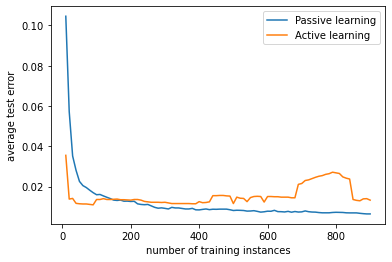

In [765]:
instances=[*range(10, 910, 10)]
plt.plot(instances,passive_error,label='Passive learning')
plt.plot(instances,active_error,label='Active learning')
plt.ylabel('average test error')
plt.xlabel('number of training instances')
plt.legend()
plt.show()

Based on the learning curve shown above, we can tell the test error for the active learning is bounding around after training instances over 400 and as the number of training instances increase. The test error for the passive learning is decreasing and stay stable as the number of training instances increase.

### Reference

1.1(b)ii. https://blog.csdn.net/shenyinwudi/article/details/118639251

2.1(b)iii. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.htmlhighlight=kmeans#sklearn.cluster.KMeans

3.1(b)iii. https://stackoverflow.com/questions/43789602/avoiding-local-minima-when-using-kmeans#:~:text=There%20is%20no%20way%20to%20technically%20avoid%20the,error%20solution%20or%20averaging%20all%20the%20cluster%20solutions.

4.1(b)iii. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors

5.1(b)iv. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html?highlight=spectralclustering#sklearn.cluster.SpectralClustering

6.2(b)i.https://blog.csdn.net/weixin_44706915/article/details/111934815